# AFCS Assignment 1

In [1]:
library(hts)
library(fpp2)
library(urca)
library("IRdisplay")

# options(repr.plot.res = 0.75)

Loading required package: forecast
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──
✔ ggplot2   3.1.1     ✔ expsmooth 2.3  
✔ fma       2.4       



## Exercise 1.2

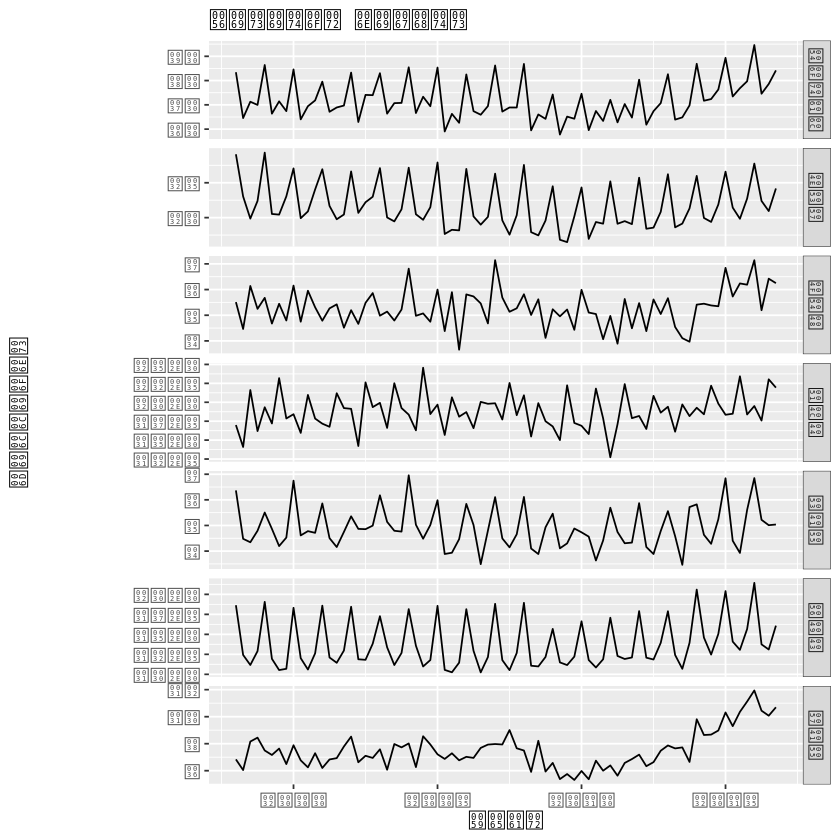

In [2]:
tourism.hts <- hts(visnights, characters = c(3, 5))
tourism.hts %>% aggts(levels=0:1) %>%
  autoplot(facet=TRUE) +
  xlab("Year") + ylab("millions") + ggtitle("Visitor nights")

## A)

## B)

In [3]:
retaildata <- readxl::read_excel("data/retail.xlsx", skip=1)
myts <- ts(retaildata[,"A3349873A"], frequency=12, start=c(1982,4))

### b.1)
Check the residuals and produce forecasts.

In [4]:
(tbats_fit <- tbats(myts))

TBATS(0.126, {5,0}, 1, {<12,5>})

Call: tbats(y = myts)

Parameters
  Lambda: 0.125564
  Alpha: 0.2091052
  Beta: -0.0005633066
  Damping Parameter: 1
  Gamma-1 Values: -0.0005245455
  Gamma-2 Values: 0.0004701076
  AR coefficients: 0.146295 0.232605 -0.058188 0.266295 -0.120957

Seed States:
              [,1]
 [1,]  5.343529684
 [2,]  0.009528314
 [3,] -0.174816403
 [4,] -0.006516769
 [5,]  0.153792959
 [6,] -0.093284110
 [7,] -0.074381301
 [8,] -0.161472998
 [9,]  0.173701547
[10,] -0.038564922
[11,] -0.086664923
[12,]  0.109858974
[13,]  0.000000000
[14,]  0.000000000
[15,]  0.000000000
[16,]  0.000000000
[17,]  0.000000000
attr(,"lambda")
[1] 0.1255636

Sigma: 0.1046371
AIC: 4114.718


	Ljung-Box test

data:  Residuals from TBATS
Q* = 71.339, df = 3, p-value = 2.22e-15

Model df: 27.   Total lags used: 30



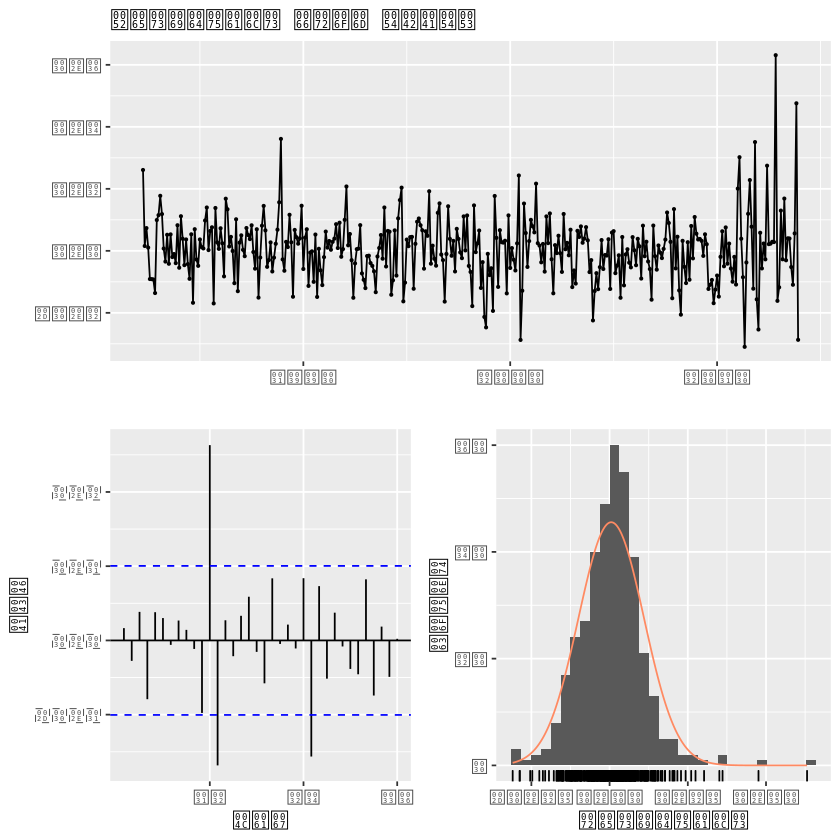

In [5]:
checkresiduals(tbats_fit)

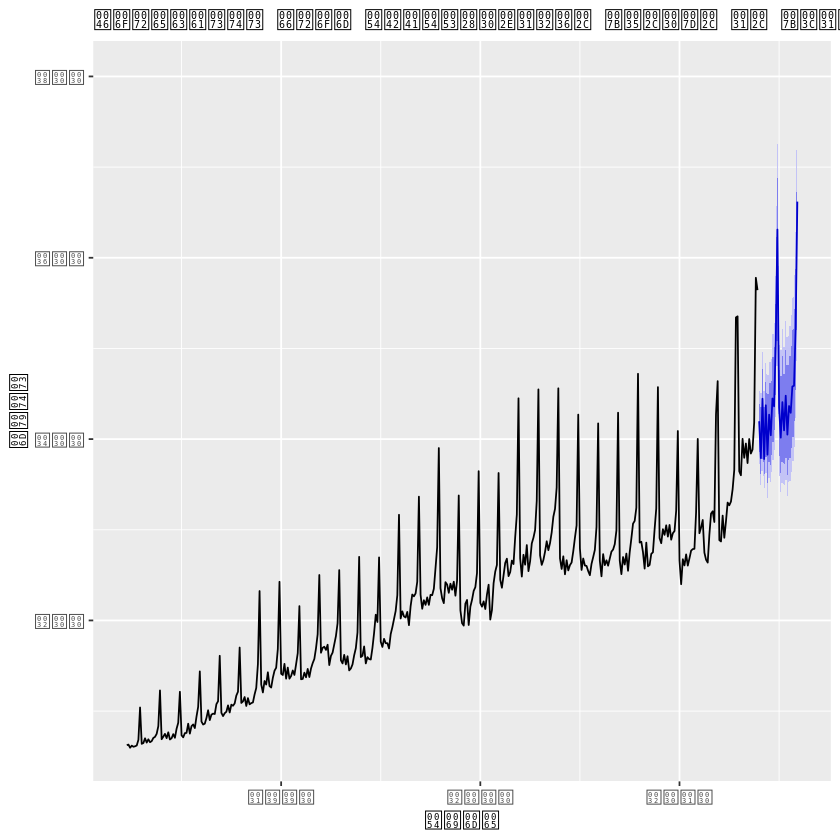

In [6]:
tbats_fit %>% forecast() %>% autoplot()

### b.2)
Does this completely automated approach work for these data?

The automated TBATS model produced sub-optimal results. Specifically the test of residuals show a non-normal distribution, both graphically and with the Ljung-Box test showing a p-value of 2.22e-15

### b.3)
Have you saved any degrees of freedom by using Fourier terms rather than seasonal differencing?


?????

## C
Consider the weekly data on US finished motor gasoline products supplied (millions of barrels per day) (series gasoline):

### c.1)
Fit a TBATS model to these data.

In [7]:
(fit <- tbats(gasoline))

TBATS(1, {0,0}, -, {<52.18,12>})

Call: tbats(y = gasoline)

Parameters
  Alpha: 0.1179622
  Gamma-1 Values: -0.001689493
  Gamma-2 Values: 0.000923819

Seed States:
              [,1]
 [1,]  7.092868030
 [2,] -0.249591452
 [3,] -0.029197412
 [4,] -0.083700551
 [5,] -0.007636274
 [6,] -0.039362634
 [7,]  0.014557156
 [8,]  0.045795217
 [9,]  0.027642824
[10,] -0.009521180
[11,] -0.013737462
[12,] -0.004533980
[13,] -0.030816532
[14,]  0.062613131
[15,] -0.046276758
[16,]  0.057721023
[17,]  0.040405109
[18,]  0.025810248
[19,]  0.064636308
[20,] -0.008760769
[21,]  0.002084245
[22,] -0.018685868
[23,] -0.030078462
[24,]  0.018380128
[25,]  0.013817125

Sigma: 0.2332401
AIC: 5882.748

### c.2)
Check the residuals and produce forecasts.


	Ljung-Box test

data:  Residuals from TBATS
Q* = 142.77, df = 76.357, p-value = 6.302e-06

Model df: 28.   Total lags used: 104.357142857143



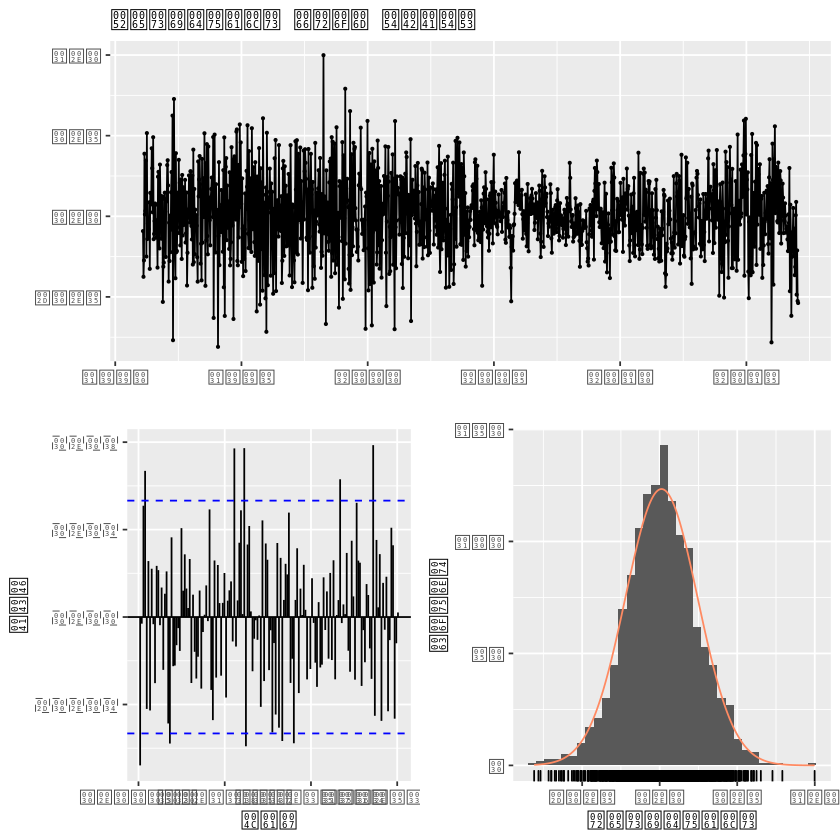

In [8]:
checkresiduals(fit)

In [16]:
fit %>% forecast(h=10)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017.069       8.332408 7.987612 8.677204 7.805088 8.859729
2017.088       8.536845 8.180928 8.892762 7.992517 9.081173
2017.107       8.558048 8.191348 8.924748 7.997229 9.118867
2017.126       8.655686 8.278510 9.032861 8.078846 9.232525
2017.145       8.536583 8.149216 8.923951 7.944156 9.129010
2017.164       8.612495 8.215197 9.009793 8.004880 9.220109
2017.184       8.624798 8.217811 9.031784 8.002366 9.247229
2017.203       8.636577 8.220128 9.053026 7.999673 9.273481
2017.222       8.568780 8.143078 8.994482 7.917725 9.219835
2017.241       8.563545 8.128787 8.998303 7.898640 9.228450

### c.3)
Could you model these data using any of the other methods we have considered so far (i.e., TSLM, ARIMA) so far?

In [10]:
(fit <- auto.arima(gasoline))

Series: gasoline 
ARIMA(0,1,1)(1,0,0)[52] 

Coefficients:
          ma1    sar1
      -0.7440  0.2618
s.e.   0.0206  0.0294

sigma^2 estimated as 0.07239:  log likelihood=-144.86
AIC=295.72   AICc=295.74   BIC=311.35


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(1,0,0)[52]
Q* = 330.24, df = 102.36, p-value < 2.2e-16

Model df: 2.   Total lags used: 104.357142857143



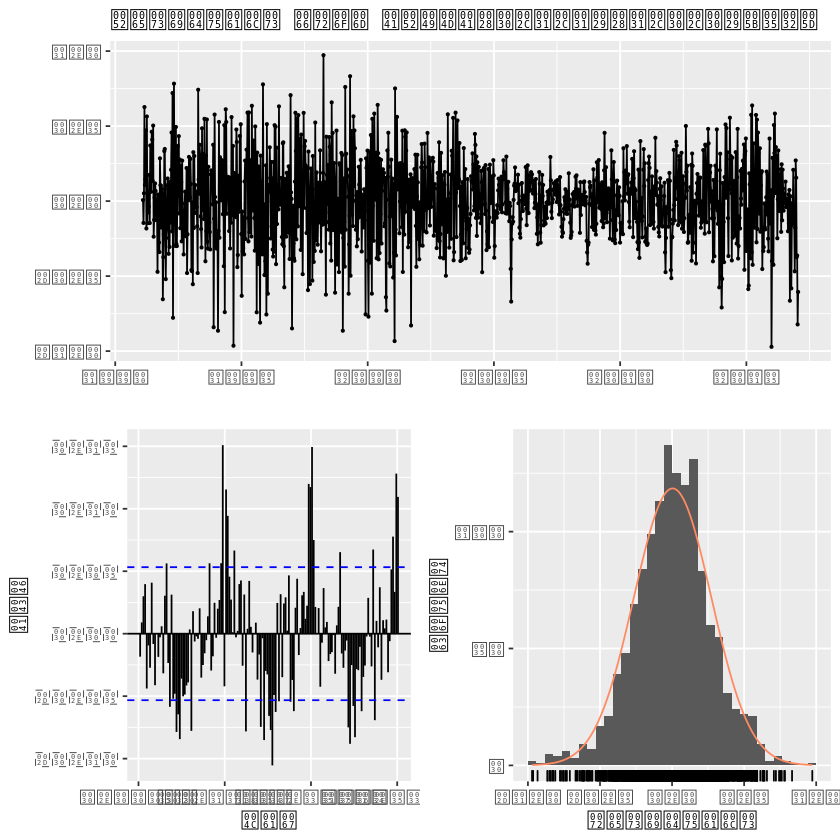

In [11]:
checkresiduals(fit)

In [15]:
fit %>% forecast(h=10)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017.069       8.332408 7.987612 8.677204 7.805088 8.859729
2017.088       8.536845 8.180928 8.892762 7.992517 9.081173
2017.107       8.558048 8.191348 8.924748 7.997229 9.118867
2017.126       8.655686 8.278510 9.032861 8.078846 9.232525
2017.145       8.536583 8.149216 8.923951 7.944156 9.129010
2017.164       8.612495 8.215197 9.009793 8.004880 9.220109
2017.184       8.624798 8.217811 9.031784 8.002366 9.247229
2017.203       8.636577 8.220128 9.053026 7.999673 9.273481
2017.222       8.568780 8.143078 8.994482 7.917725 9.219835
2017.241       8.563545 8.128787 8.998303 7.898640 9.228450

## D
Experiment with using nnetar() on your Retail (use the same from 1.1.d) , gasoline and fancy data we have considered previously.

In [17]:
(retail_nn <- nnetar(myts))

Series: myts 
Model:  NNAR(3,1,2)[12] 
Call:   nnetar(y = myts)

Average of 20 networks, each of which is
a 4-2-1 network with 13 weights
options were - linear output units 

sigma^2 estimated as 373.2

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”

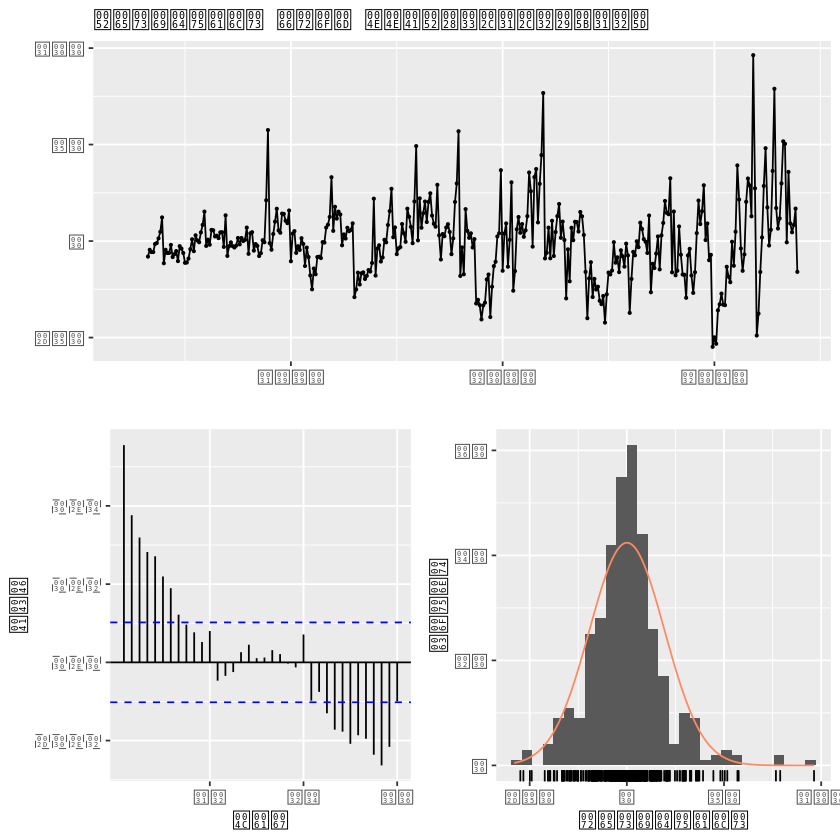

In [18]:
checkresiduals(retail_nn)

In [19]:
(gasoline_nn <- nnetar(gasoline))

Series: gasoline 
Model:  NNAR(11,1,6)[52] 
Call:   nnetar(y = gasoline)

Average of 20 networks, each of which is
a 12-6-1 network with 85 weights
options were - linear output units 

sigma^2 estimated as 0.05354

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”

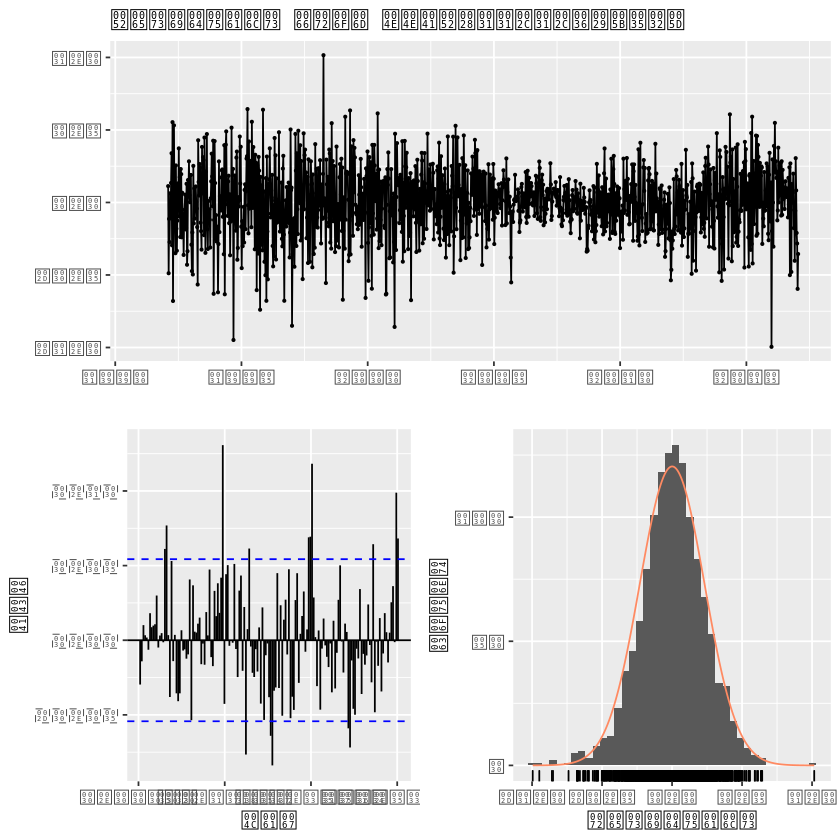

In [20]:
checkresiduals(gasoline_nn)

### d.1)
Plot different forecast horizon.

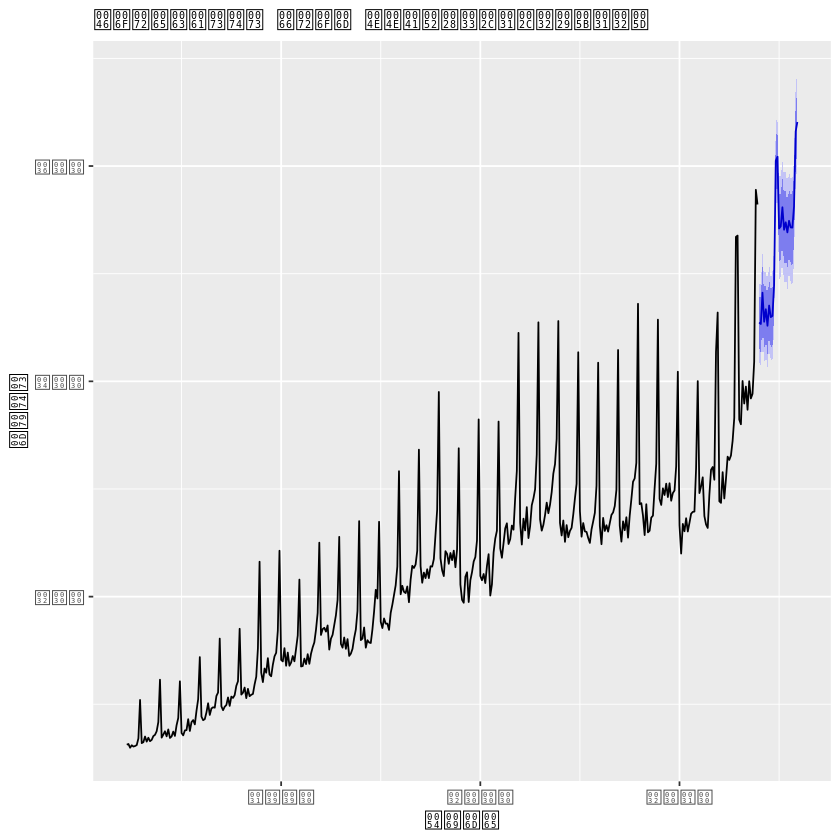

In [25]:
retail_nn %>% forecast(PI=TRUE) %>% autoplot()

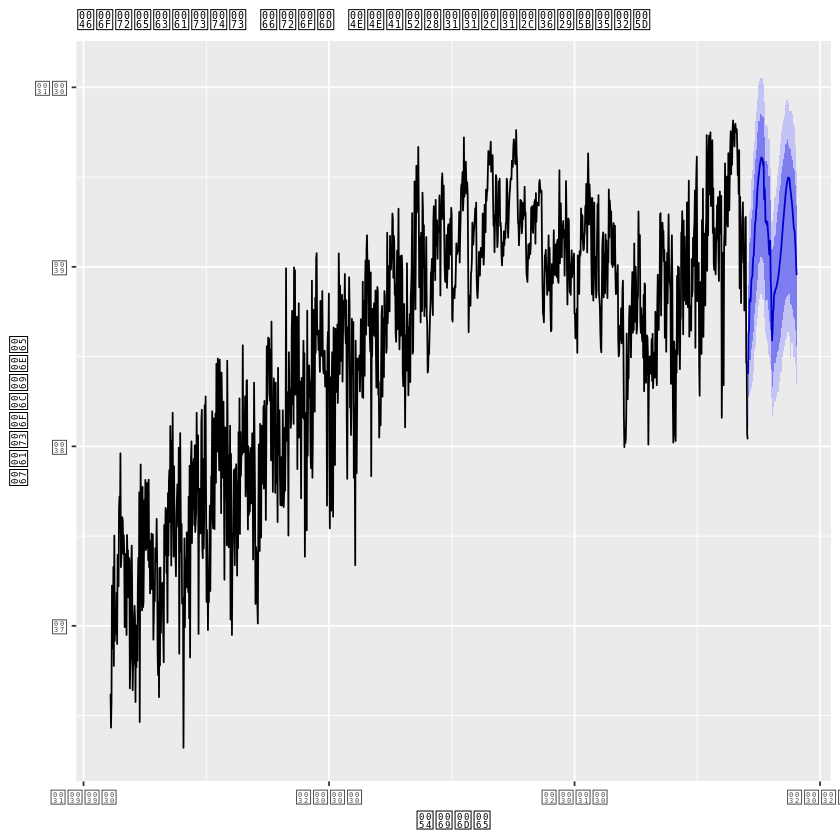

In [26]:
gasoline_nn %>% forecast(PI=TRUE) %>% autoplot()

### d.2)
Elaborate and reflect your response on how the predictions seem using nnetar.

nnetar predictions take signficantly longer to compute due to the nature of neural networks vs closed-form statistical solutions. The computational effort required further increases with the inclusion prediciton intervals which are created via numerous simulations.